## Demand VS number of vehicles analysis

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pp
import matplotlib
from pandas.tools.plotting import table
import math
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.options.mode.chained_assignment = None
palette = sns.color_palette()
font = {'family' : 'normal',
        'size'   : 22}

matplotlib.rc('font', **font)

In [ ]:
stability = pd.read_csv('stability.csv')

In [60]:
stability

,ratio,demands,vehicles,totalEnergy,averageWaitingTime,maxWaitingTime,minWaitingTime,stabilityWaitingTime,averageJourneyTime,averageOccupancy,averageLoadFactor,maxLoadFactor,minLoadFactor,stabilityLoadFactor,completedBookingsPercentage
0,144,27.0,5,0.320778,8,19,2,17,26,0.590252,0.065447,0.127936,0.000000,0.127936,0.222222
1,144,27.0,5,0.347617,12,21,2,19,24,0.342342,0.052168,0.208144,0.000000,0.208144,0.148148
2,144,27.0,5,0.328641,14,19,6,13,23,0.284397,0.049985,0.167385,0.000000,0.167385,0.148148
3,24,27.0,5,0.402208,7,16,1,15,21,1.274974,0.114770,0.253992,0.000000,0.253992,0.296296
4,24,27.0,5,0.418168,7,15,0,15,31,1.422358,0.116733,0.228339,0.000000,0.228339,0.296296
5,24,27.0,5,0.415402,9,17,1,16,22,0.984773,0.097788,0.206387,0.000000,0.206387,0.259259
6,48,27.0,5,0.398464,13,13,1,12,47,1.178000,0.118689,0.179944,0.042944,0.136999,0.256296
7,48,27.0,5,0.361778,6,11,1,10,17,0.511667,0.061715,0.142585,0.000000,0.142585,0.259259
8,1,27.0,5,0.414156,3,8,0,8,12,0.582079,0.059584,0.144992,0.000000,0.144992,0.296296


In [61]:
avgstab = stability.groupby("ratio").mean()

In [62]:
avgstab

,demands,vehicles,totalEnergy,averageWaitingTime,maxWaitingTime,minWaitingTime,stabilityWaitingTime,averageJourneyTime,averageOccupancy,averageLoadFactor,maxLoadFactor,minLoadFactor,stabilityLoadFactor,completedBookingsPercentage
ratio,,,,,,,,,,,,,,
1,27.0,5.0,0.414156,3.000000,8.000000,0.000000,8.000000,12.000000,0.582079,0.059584,0.144992,0.000000,0.144992,0.296296
24,27.0,5.0,0.411926,7.666667,16.000000,0.666667,15.333333,24.666667,1.227368,0.109764,0.229573,0.000000,0.229573,0.283951
48,27.0,5.0,0.380121,9.500000,12.000000,1.000000,11.000000,32.000000,0.844833,0.090202,0.161264,0.021472,0.139792,0.257778
144,27.0,5.0,0.332346,11.333333,19.666667,3.333333,16.333333,24.333333,0.405664,0.055866,0.167822,0.000000,0.167822,0.172840


In [63]:
pp.figure(figsize=(10,12))

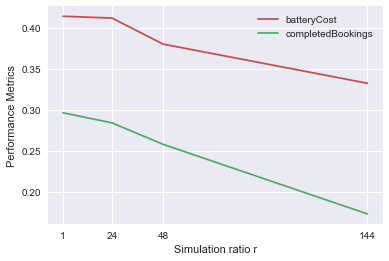

In [64]:
pp.plot(avgstab.index, avgstab['totalEnergy'], color = palette[2], label='batteryCost');
pp.plot(avgstab.index, avgstab['completedBookingsPercentage'], color = palette[1], label='completedBookings');
#pp.plot(vehicles, performances.groupby('vehicles').mean()['score'], color = palette[0], label='Average journey time');
pp.legend(loc=1)
pp.xticks([1,24,48,144])
pp.xlabel("Simulation ratio r")
pp.ylabel("Performance Metrics")
#pp.title("Average costs")
pp.savefig('stability.png')

### Distribution of demand

In [12]:
bookings = pd.read_csv('bookings.csv')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113cf9690>]], dtype=object)

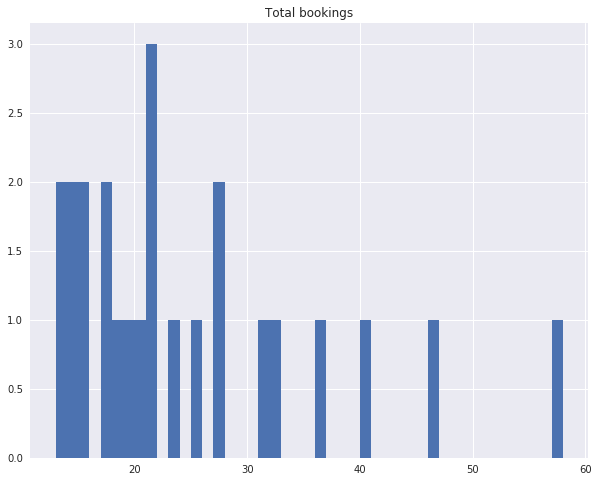

In [76]:
bookings.hist(column='Total bookings', bins=45, figsize = (10,8))

In [18]:
bookings.median()

time              11.5
Stop 1             1.0
Stop 10            0.0
Stop 11            1.0
Stop 12            1.0
Stop 13            0.0
Stop 14            0.0
Stop 15            0.5
Stop 16            0.0
Stop 17            0.0
Stop 18            0.0
Stop 19            0.0
Stop 2             1.0
Stop 20            0.0
Stop 21            1.0
Stop 22            1.0
Stop 23            1.0
Stop 24            1.0
Stop 25            0.0
Stop 26            0.0
Stop 27            1.0
Stop 28            1.0
Stop 29            1.0
Stop 3             1.0
Stop 30            1.0
Stop 31            1.0
Stop 32            1.0
Stop 4             1.0
Stop 5             0.0
Stop 6             0.0
Stop 7             0.0
Stop 8             0.0
Stop 9             1.0
Total bookings    21.0
dtype: float64

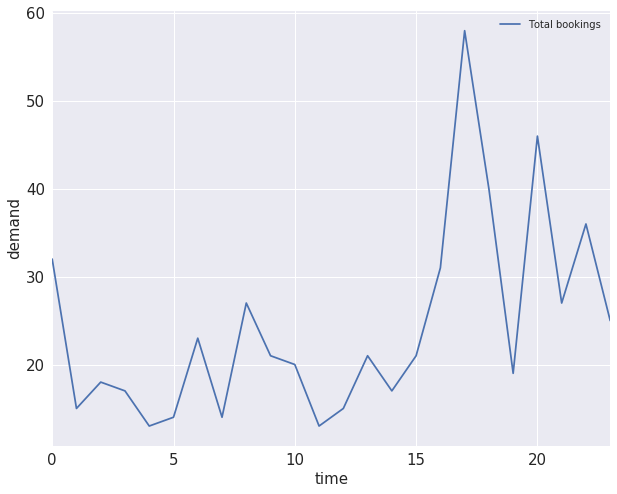

In [84]:
fig =bookings.plot(x='time', y='Total bookings',figsize = (10,8), fontsize = 15)
fig.set_xlabel("time",fontsize=15)
fig.set_ylabel("demand",fontsize=15)
pp.savefig("demand")

## Find optimal number of vehicles

In [5]:
performances = pd.read_csv('optimalNumberVehicles.csv')
performances = performances.sort_values(['demands','vehicles'])
analyze = 15
 
demand = performances[performances['demands'] == analyze]
cols = ['totalEnergy','averageWaitingTime','completedBookingsPercentage']
#demand.plot(x='vehicles', y=cols,figsize = (10,7))
#demand.plot(x='vehicles', y='averageWaitingTime',figsize = (10,7))

In [39]:
performances[20:]

,time,demands,vehicles,totalEnergy,averageWaitingTime,maxWaitingTime,minWaitingTime,stabilityWaitingTime,averageJourneyTime,averageOccupancy,averageLoadFactor,maxLoadFactor,minLoadFactor,stabilityLoadFactor,completedBookingsPercentage
24,2017-01-01T13:00:00.000Z,21.0,4,0.398665,9,12,2,10,23,1.297608,0.077465,0.243649,0.000000,0.243649,0.380952
23,2017-01-01T13:00:00.000Z,21.0,5,0.471490,9,13,1,12,26,0.691667,0.054575,0.197491,0.000000,0.197491,0.333333
22,2017-01-01T13:00:00.000Z,21.0,6,0.559130,1,4,0,4,14,0.273375,0.027559,0.087967,0.000000,0.087967,0.285714
21,2017-01-01T13:00:00.000Z,21.0,7,0.653519,2,4,1,3,14,0.511015,0.050366,0.271281,0.000000,0.271281,0.428571
20,2017-01-01T13:00:00.000Z,21.0,8,0.667949,1,4,0,4,17,0.461928,0.045329,0.161363,0.000000,0.161363,0.476190
19,2017-01-01T13:00:00.000Z,21.0,9,0.526507,7,7,0,7,64,0.221255,0.025987,0.106171,0.000000,0.106171,0.285714
18,2017-01-01T13:00:00.000Z,21.0,10,0.915000,1,4,0,4,17,0.374984,0.035765,0.208448,0.000000,0.208448,0.476190
50,2017-01-01T13:00:00.000Z,23.0,2,0.202521,11,26,4,22,16,1.378378,0.137313,0.151176,0.123451,0.027725,0.347826
41,2017-01-01T13:00:00.000Z,23.0,3,0.198798,21,24,4,20,23,0.142361,0.027604,0.082812,0.000000,0.082812,0.086957
40,2017-01-01T13:00:00.000Z,23.0,4,0.335366,11,17,0,17,38,1.066327,0.101316,0.202900,0.032967,0.169933,0.391304


In [10]:
# scale for each group
num_instances = int(len(performances)/9)
for i in range(0, num_instances):
    newCols = mms.fit_transform(scale[cols].iloc[i*9:i*9+9])
    for j in range(0, len(cols)):
        for k in range(0,9):
            scale[cols[j]].iloc[i*9+k] = newCols[k][j]

NameError: name 'mms' is not defined

In [40]:
num_instances = int(len(performances)/9)


#performances['score'] = scale.apply(lambda x: (x.averageWaitingTime+x.totalEnergy)/np.exp(x.completedBookingsPercentage), axis = 1)

In [41]:
optimalVehicles = performances.groupby(['demands'])['score'].transform(min) == performances['score']
optimalVehicles = performances[optimalVehicles]
optimalVehicles

KeyError: 'Column not found: score'

In [42]:
performances.columns.values

array(['time', 'demands', 'vehicles', 'totalEnergy', 'averageWaitingTime',
       'maxWaitingTime', 'minWaitingTime', 'stabilityWaitingTime',
       'averageJourneyTime', 'averageOccupancy', 'averageLoadFactor',
       'maxLoadFactor', 'minLoadFactor', 'stabilityLoadFactor',
       'completedBookingsPercentage'], dtype=object)

### Clean the data

In [6]:
low = .05
high = .95
def clean_col(col):
    column = performances[[col]]
    down_quantiles = column.quantile(low)
    high_quantiles = column.quantile(high)
    outliers_low = (column < down_quantiles)
    outliers_high = (column > high_quantiles)
    column = column.mask(outliers_low, down_quantiles, axis=1)  
    column = column.mask(outliers_high, high_quantiles, axis=1)  
    return column

In [7]:
performances['averageWaitingTime'] = clean_col('averageWaitingTime')

In [8]:
performances['totalEnergy'] = clean_col('totalEnergy')

### Impact of vehicles on different costs

In [9]:
vehicles = range(2,11)

#### Energy cost

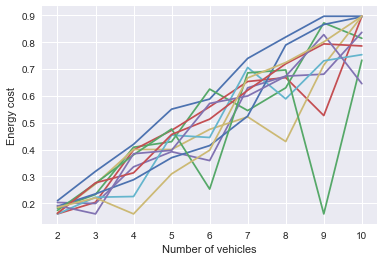

In [47]:
for i in range(0,num_instances):
    pp.plot(vehicles, performances['totalEnergy'].iloc[(i*9):(i*9+9)])
pp.xticks(vehicles)
pp.xlabel("Number of vehicles")
pp.ylabel("Energy cost")

In [48]:
np.corrcoef(performances['totalEnergy'], performances['vehicles'])

array([[ 1.        ,  0.90540449],
       [ 0.90540449,  1.        ]])

In [49]:
np.corrcoef(performances['totalEnergy'], performances['demands'])

array([[ 1.        , -0.08015221],
       [-0.08015221,  1.        ]])

In [50]:
np.corrcoef(performances['averageWaitingTime'], performances['vehicles'])

array([[ 1.        , -0.57586635],
       [-0.57586635,  1.        ]])

In [51]:
np.corrcoef(performances['averageWaitingTime'], performances['demands'])

array([[ 1.        ,  0.24818231],
       [ 0.24818231,  1.        ]])

#### Average waiting time

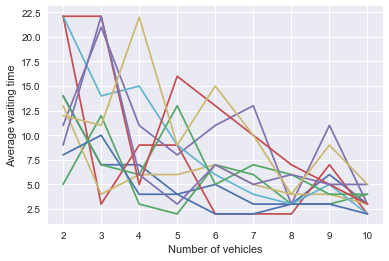

In [52]:
for i in range(0,num_instances):
    pp.plot(vehicles, performances['averageWaitingTime'].iloc[(i*9):(i*9+9)])
pp.xticks(vehicles)
pp.xlabel("Number of vehicles")
pp.ylabel("Average waiting time")

#### Average journey time

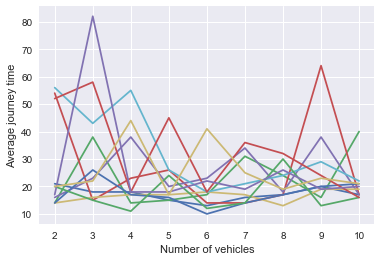

In [53]:
for i in range(0,num_instances):
    pp.plot(vehicles, performances['averageJourneyTime'].iloc[(i*9):(i*9+9)])
pp.xticks(vehicles)
pp.xlabel("Number of vehicles")
pp.ylabel("Average journey time")

#### Average load factor

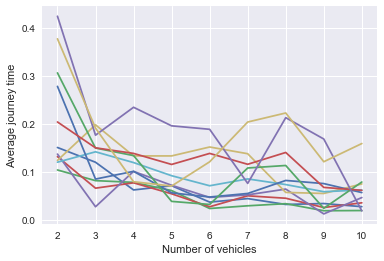

In [54]:
for i in range(0,num_instances):
    pp.plot(vehicles, performances['averageLoadFactor'].iloc[(i*9):(i*9+9)])
pp.xticks(vehicles)
pp.xlabel("Number of vehicles")
pp.ylabel("Average journey time")

#### Averages over all instances

In [57]:
averages = performances.groupby('vehicles').mean()

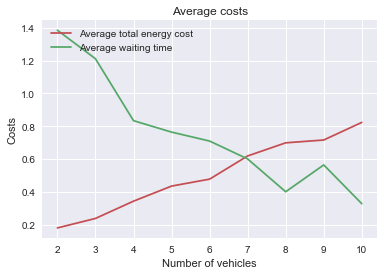

In [117]:
pp.plot(vehicles, averages['totalEnergy'], color = palette[2], label='Average total energy cost');
pp.plot(vehicles, averages['averageWaitingTime']/10, color = palette[1], label='Average waiting time');
#pp.plot(vehicles, performances.groupby('vehicles').mean()['score'], color = palette[0], label='Average journey time');
pp.legend(loc=2)
pp.xticks(vehicles)
pp.xlabel("Number of vehicles")
pp.ylabel("Costs")
pp.title("Average costs")
pp.savefig('costvswaitingtime.png')

We compute the difference in cost between 2 vehicles and 10 vehicles

In [59]:
def increase(cost):
    print('Low: '+str(averages[cost].iloc[0]))
    print('High: '+str(averages[cost].iloc[8]))
    difference = averages[cost].iloc[8]-averages[cost].iloc[0]
    print('Difference: '+str(difference))
    increase = averages[cost].iloc[8]/averages[cost].iloc[0]
    print('Increase: '+str(increase))

In [60]:
def decrease(cost):
    print('High: '+str(averages[cost].iloc[0]))
    print('Low: '+str(averages[cost].iloc[8]))
    difference = averages[cost].iloc[0]-averages[cost].iloc[8]
    print('Difference: '+str(difference))
    increase = averages[cost].iloc[0]/averages[cost].iloc[8]
    print('Decrease: '+str(increase))

In [61]:
increase('totalEnergy')

Low: 0.179587141918
High: 0.822753784075
Difference: 0.643166642158
Increase: 4.58136242545


In [62]:
decrease('averageWaitingTime')

High: 13.8454545455
Low: 3.27272727273
Difference: 10.5727272727
Decrease: 4.23055555556


In [63]:
decrease('averageJourneyTime')

High: 27.0909090909
Low: 20.5454545455
Difference: 6.54545454545
Decrease: 1.3185840708


In [64]:
increase("completedBookingsPercentage")

Low: 0.330074044085
High: 0.44253647216
Difference: 0.112462428075
Increase: 1.34071878747


In [65]:
decrease('averageLoadFactor')

High: 0.214621400537
Low: 0.0585313774037
Difference: 0.156090023133
Decrease: 3.66677515645


# Linear Regression: number of vehicles and demands to predict costs

## Only vehicles

In [66]:
from sklearn import linear_model
# Linear regression Cost~vehicles
def linear_regression_one(data,feature,cost):
    lr = linear_model.LinearRegression()
    #lr = linear_model.RANSACRegressor(linear_model.LinearRegression())
    reg = lr.fit(data[feature].values.reshape(-1,1), data[cost])
    #pp.scatter(vehicles*num_instances, data[cost].values.ravel(), color='black')
    pp.scatter(data[feature].values.ravel(), data[cost].values.ravel(), color='black')
    #pp.plot(vehicles*num_instances, reg.predict(data[feature].values.reshape(-1,1)), color='blue',linewidth=1)
    pp.plot(data[feature].values.ravel(), reg.predict(data[feature].values.reshape(-1,1)), color='blue',linewidth=1)
    # R^2
    print("R^2 value: "+str(reg.score(data[feature].values.reshape(-1,1), data[cost])))
    print("RSS: "+str(reg.residues_))
    return reg

In [67]:
# Linear regression Cost~[Feature_list]
def linear_regression_features(data, cost):
    lr = linear_model.LinearRegression()
    #lr = linear_model.RANSACRegressor(linear_model.LinearRegression())
    reg = lr.fit(data[feature_list].values, data[cost].values)
    # R^2 
    reg.score(data[feature_list].values, data[cost].values)
    print("R^2 value: "+str(reg.score(data[feature_list].values, data[cost].values)))
    residuals = data[cost] - reg.predict(data[feature_list].values)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((data[cost]-np.mean(data[cost]))**2)
    r_squared = 1 - (ss_res / ss_tot)
    print('RSS: '+ str(ss_res)) 
    return reg

R^2 value: 0.819757285235
RSS: 0.965799135851


/Users/prisca/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

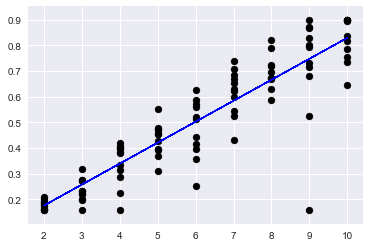

In [68]:
linear_regression_one(performances,'vehicles','totalEnergy')

R^2 value: 0.331622051135
RSS: 1889.15812014


/Users/prisca/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

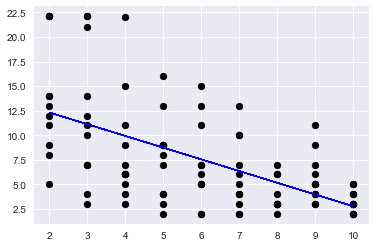

In [69]:
linear_regression_one(performances,'vehicles','averageWaitingTime')

### Vehicles and demands

In [70]:
feature_list = ['vehicles', 'demands']

In [71]:
energyReg = linear_regression_features(performances, 'totalEnergy')
performances['energyScore'] = performances.apply(lambda x: energyReg.predict(x[feature_list].values)[0], axis=1)

R^2 value: 0.82717213721
RSS: 0.926067945388


/Users/prisca/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/prisca/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/prisca/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single s

In [72]:
waitingReg = linear_regression_features(performances, 'averageWaitingTime')
performances['waitingScore'] = performances.apply(lambda x: waitingReg.predict(x[feature_list].values)[0], axis=1)

R^2 value: 0.395113769615
RSS: 1709.69993225


/Users/prisca/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/prisca/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/prisca/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single s

Add dummy variables to overcome different ranges of cost problem:

In [73]:
# Add boolean columns to overcome Multicollinearity
feature_list = []
for i in range(1, num_instances+1):
    col_name = ("b"+str(i))
    feature_list.append(col_name)

# Fill columns b1 to b(n-1), where n is the number of instances, with 1s in the appropriate position. 
# The last column remains 0
booleans = pd.DataFrame(0, index=performances.index, columns=feature_list)
for i in range(0, num_instances-1):
    for j in range(0,9):
        booleans.iloc[i*(9)+j][i] = 1

# Add the booleans values to the data
performances_bool = pd.concat([performances, booleans],axis=1)
feature_list.append('vehicles')
feature_list.append('demands')

In [74]:
feature_list

['b1',
 'b2',
 'b3',
 'b4',
 'b5',
 'b6',
 'b7',
 'b8',
 'b9',
 'b10',
 'b11',
 'vehicles',
 'demands']

In [75]:
regWaiting = linear_regression_features(performances_bool,'averageWaitingTime')


R^2 value: 0.529031298595
RSS: 1331.18447145


In [76]:
performances['waitingScore'] = performances_bool.apply(lambda x: regWaiting.predict(x[feature_list].values)[0], axis=1)

/Users/prisca/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/prisca/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/prisca/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single s

In [77]:
residuals = performances['averageWaitingTime'] - regWaiting.predict(performances_bool[feature_list].values)

In [78]:
regEnergy = linear_regression_features(performances_bool,'totalEnergy')

R^2 value: 0.851238416223
RSS: 0.797112988709


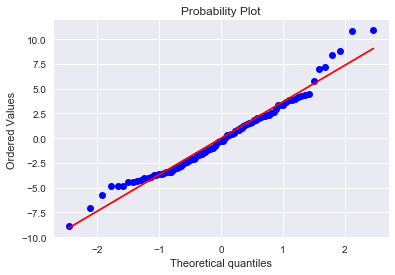

In [79]:
from scipy import stats
res = stats.probplot(residuals, plot=pp)

In [80]:
residuals = performances['totalEnergy'] - regEnergy.predict(performances_bool[feature_list].values)

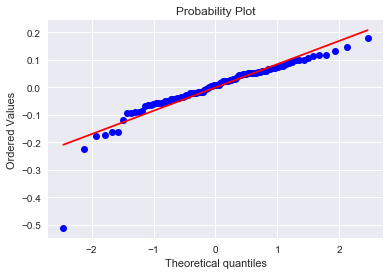

In [81]:
from scipy import stats
res = stats.probplot(residuals, plot=pp)

(array([  1.,   0.,   0.,   0.,   3.,   3.,  24.,  32.,  30.,   6.]),
 array([-0.51070352, -0.44180048, -0.37289744, -0.3039944 , -0.23509136,
        -0.16618832, -0.09728527, -0.02838223,  0.04052081,  0.10942385,
         0.17832689]),
 <a list of 10 Patch objects>)

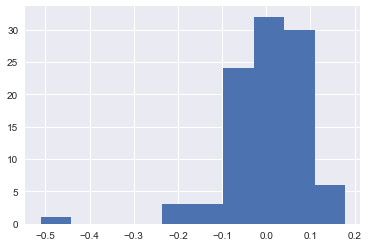

In [82]:
pp.hist(residuals)

In [83]:
performances['energyScore'] = performances_bool.apply(lambda x: regEnergy.predict(x[feature_list].values)[0], axis=1)

/Users/prisca/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/prisca/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/prisca/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single s

In [84]:
regCompletedBookings = linear_regression_features(performances_bool,'completedBookingsPercentage')

R^2 value: 0.609433007399
RSS: 0.766348549531


## Cost function

In [85]:
feature_list = [
 'vehicles',
 'demands']

In [86]:
def cost(df):
    if(df['waitingScore']<6):
        waitingCost = 0
    else:
        waitingCost = 1000
    return waitingCost + df['energyScore']

In [87]:
performances['regScore'] = performances.apply(cost , axis = 1)

In [88]:
optimalVehicles = performances.groupby(['demands'])['regScore'].transform(min) == performances['regScore']

In [89]:
performances[optimalVehicles]

,time,demands,vehicles,totalEnergy,averageWaitingTime,maxWaitingTime,minWaitingTime,stabilityWaitingTime,averageJourneyTime,averageOccupancy,averageLoadFactor,maxLoadFactor,minLoadFactor,stabilityLoadFactor,completedBookingsPercentage,energyScore,waitingScore,regScore
2,2017-01-01T04:00:00.000Z,13.0,6,0.587918,5.0,18,0,18,13,0.392121,0.037269,0.107315,0.000000,0.107315,0.538462,0.604179,5.777778,0.604179
55,2017-01-01T13:00:00.000Z,15.0,6,0.625150,7.0,12,0,12,17,0.232653,0.023907,0.115838,0.000000,0.115838,0.400000,0.526449,5.000000,0.526449
21,2017-01-01T13:00:00.000Z,21.0,7,0.653519,2.0,4,1,3,14,0.511015,0.050366,0.271281,0.000000,0.271281,0.428571,0.585773,5.249749,0.585773
47,2017-01-01T13:00:00.000Z,23.0,10,0.836655,3.0,9,1,8,17,0.447056,0.046735,0.171436,0.000000,0.171436,0.434783,0.805250,5.398995,0.805250
43,2017-01-01T13:00:00.000Z,25.0,6,0.521764,5.0,12,0,12,17,1.534778,0.138085,0.394082,0.000000,0.394082,0.560000,0.511053,5.241864,0.511053
67,2017-01-01T13:00:00.000Z,27.0,9,0.730654,5.0,17,0,17,29,0.619925,0.058929,0.208386,0.000000,0.208386,0.407407,0.720902,5.282579,0.720902
72,2017-01-01T13:00:00.000Z,31.0,5,0.369490,4.0,9,0,9,16,0.733241,0.056589,0.096711,0.016605,0.080107,0.387097,0.426051,5.428029,0.426051
46,2017-01-01T13:00:00.000Z,36.0,8,0.696529,6.0,10,0,10,30,0.976444,0.113572,0.424822,0.000000,0.424822,0.500000,0.589011,4.921720,0.589011
85,2017-01-01T13:00:00.000Z,40.0,2,0.162104,22.1,27,0,27,52,1.980000,0.204284,0.265409,0.143159,0.122249,0.225000,0.188997,16.289894,1000.188997
92,2017-01-01T13:00:00.000Z,46.0,8,0.673129,6.0,16,0,16,26,2.286261,0.213269,0.453473,0.025802,0.427671,0.391304,0.657765,5.155053,0.657765


In [90]:
performances

,time,demands,vehicles,totalEnergy,averageWaitingTime,maxWaitingTime,minWaitingTime,stabilityWaitingTime,averageJourneyTime,averageOccupancy,averageLoadFactor,maxLoadFactor,minLoadFactor,stabilityLoadFactor,completedBookingsPercentage,energyScore,waitingScore,regScore
6,2017-01-01T04:00:00.000Z,13.0,2,0.209159,14.0,25,1,24,21,1.453333,0.151073,0.253337,0.048810,0.204527,0.615385,0.277612,10.601005,1000.277612
5,2017-01-01T04:00:00.000Z,13.0,3,0.318643,7.0,19,0,19,18,1.223032,0.120334,0.235721,0.045968,0.189753,0.769231,0.359254,9.395198,1000.359254
3,2017-01-01T04:00:00.000Z,13.0,4,0.419395,7.0,17,0,17,18,0.540686,0.062610,0.149427,0.000000,0.149427,0.615385,0.440895,8.189392,1000.440895
8,2017-01-01T04:00:00.000Z,13.0,5,0.550346,4.0,18,0,18,15,0.743944,0.071428,0.209601,0.000000,0.209601,0.769231,0.522537,6.983585,1000.522537
2,2017-01-01T04:00:00.000Z,13.0,6,0.587918,5.0,18,0,18,13,0.392121,0.037269,0.107315,0.000000,0.107315,0.538462,0.604179,5.777778,0.604179
1,2017-01-01T04:00:00.000Z,13.0,7,0.739564,3.0,9,0,9,16,0.446489,0.044536,0.257302,0.000000,0.257302,0.692308,0.685820,4.571971,0.685820
0,2017-01-01T04:00:00.000Z,13.0,8,0.819197,3.0,9,0,9,17,0.324294,0.032386,0.208132,0.000000,0.208132,0.615385,0.767462,3.366164,0.767462
4,2017-01-01T04:00:00.000Z,13.0,9,0.896694,6.0,15,0,15,20,0.357068,0.034275,0.208461,0.000000,0.208461,0.692308,0.849104,2.160357,0.849104
7,2017-01-01T04:00:00.000Z,13.0,10,0.896694,3.0,5,0,5,17,0.292861,0.027723,0.199490,0.000000,0.199490,0.615385,0.930746,0.954550,0.930746
59,2017-01-01T13:00:00.000Z,15.0,2,0.181231,5.0,10,0,10,14,0.756000,0.104239,0.119396,0.089082,0.030314,0.400000,0.199883,9.823228,1000.199883


In [91]:
#functionVehicles.coef_

In [92]:
optimalVehicles['optVehicles'] = optimalVehicles.apply(lambda x: x.demands* 0.18542689, axis =1)

TypeError: <lambda>() got an unexpected keyword argument 'axis'

In [93]:
feature_list = [
 'vehicles',
 'demands']
reg =linear_regression_one(optimalVehicles,'demands', 'vehicles')

KeyError: 'demands'

In [94]:
reg.estimator_.coef_

NameError: name 'reg' is not defined

In [95]:
0.14629664

0.14629664

In [96]:
0.14629664 * 13

1.90185632

In [97]:
def linear(x, a, b, *c):
    return np.hstack(b).dot(x)

# Non linear function fit

In [98]:
from scipy.optimize import curve_fit
# Exponential function
def func_exp(x, a, c, *b):
    return a * np.exp(np.hstack(b).dot(x)) + c

In [99]:
feature_list = ['b1',
 'b2',
 'b3',
 'b4',
 'b5',
 'b6',
 'b7',
 'b8',
 'b9',
 'b10',
 'b11',
 'vehicles',
 'demands']

In [100]:
# Cost~[ForecastError,b1,...,bn]
def exp_fit(data, cost):
    popt, pcov = curve_fit(func_exp, data[feature_list].T, data[cost],p0=np.zeros(len(feature_list)+2),maxfev=100000)
    residuals = data[cost] - func_exp(data[feature_list].T, popt[0], popt[1], *(popt[2:len(popt)].ravel()))
    ss_res = np.sum(residuals**2)
    print('RSS: '+ str(ss_res))
    return popt

In [101]:
# Cost~[ForecastError,b1,...,bn]
def poly_fit(data, cost):
    c,stats = np.polynomial.polynomial.polyfit(data[cost], data[feature_list], 2, full = True)
    residuals = stats[0]
    rss = np.sum(residuals)
    print('RSS: '+ str(rss))

In [102]:
popt=exp_fit(performances_bool, 'averageWaitingTime')

RSS: 1331.32252278


In [103]:
poly_fit(performances_bool, 'averageWaitingTime')

RSS: 15927.6602637


In [104]:
residuals = data[cost] - reg.predict(data[feature_list].values)



NameError: name 'data' is not defined

In [ ]:
feature_list = [
 'vehicles',
 'demands']

In [ ]:
popt=exp_fit(performances, 'score')

In [ ]:
popt=poly_fit(performances, 'score')

In [ ]:
poly_fit(performances, 'averageWaitingTime')
1331.18447145

In [ ]:
poly_fit(scale,'averageWaitingTime')

In [ ]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c
def fit(cost):
    # Exponential fit
    popt, pcov = curve_fit(func, performances['vehicles'].values.ravel(), performances[cost])
    residuals = performances[cost] - func(performances['vehicles'].values.ravel(), popt[0], popt[1], popt[2])
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((performances[cost]-np.mean(performances[cost]))**2)
    r_squared = 1 - (ss_res / ss_tot)
    print('Exp RSS: '+ str(ss_res))
    pp.plot(np.arange(2, 11, 1), func(np.arange(2, 11, 1), popt[0], popt[1], popt[2]), color='#50c94c',linewidth=3, label='Exponential Fit')
    #p = pp.boxplot([forecast0, forecast25, forecast50, forecast75, forecast1], positions=forecast_error, widths=[0.03]*5, manage_xticks=False,patch_artist=True)
    colors = ['#dce4f7']*9
    #for patch, color in zip(p['boxes'], colors):
    #    patch.set_facecolor(color)
    #    patch.set_color(color)
    pp.xticks(vehicles)
    pp.xlabel("vehicles")
    pp.ylabel("cost")
    pp.legend(loc=4)

Exp RSS: 2265.15643539


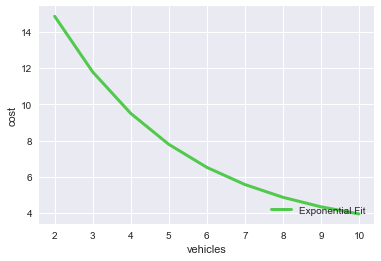

In [494]:
fit('averageWaitingTime')

In [492]:
np.arange(2, 11, 1)

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])

# Plot data

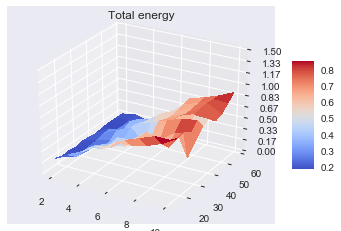

In [105]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.mlab import griddata

df = performances.copy()
x1 = np.linspace(df['vehicles'].min(), df['vehicles'].max(), len(df['vehicles'].unique()))
y1 = np.linspace(df['demands'].min(), df['demands'].max(), len(df['demands'].unique()))

x2, y2 = np.meshgrid(x1, y1)

# Interpolate unstructured D-dimensional data.
z2 = griddata(df['vehicles'], df['demands'], df['totalEnergy'], x2, y2, interp='linear')

# Ready to plot
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x2, y2, z2, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(0, 1.5)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Total energy')

plt.show()

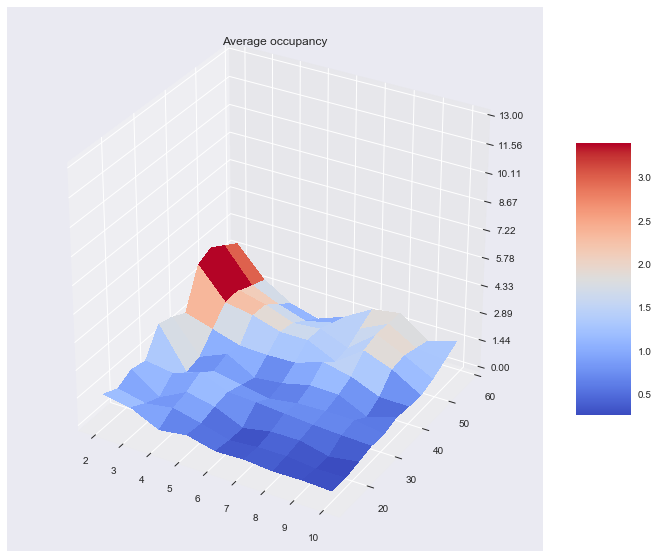

In [110]:
# Interpolate unstructured D-dimensional data.
z2 = griddata(df['vehicles'], df['demands'], df['averageOccupancy'], x2, y2, interp='linear')

# Ready to plot
fig = plt.figure(figsize=(12,10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x2, y2, z2, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(0, 13)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Average occupancy')
plt.savefig('occupancy.png')
plt.show()


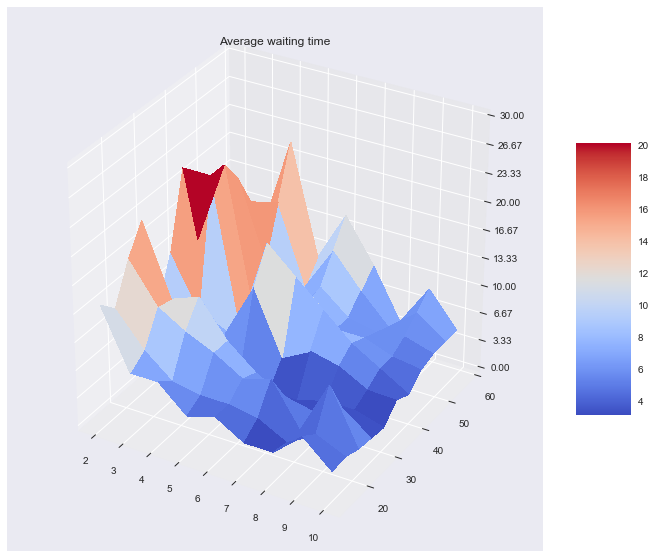

In [112]:
# Interpolate unstructured D-dimensional data.
z2 = griddata(df['vehicles'], df['demands'], df['averageWaitingTime'], x2, y2, interp='linear')

# Ready to plot
fig = plt.figure(figsize=(12,10))

ax = fig.gca(projection='3d')
surf = ax.plot_surface(x2, y2, z2, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(0, 30)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Average waiting time')
plt.savefig('waitingtime.png')


plt.show()

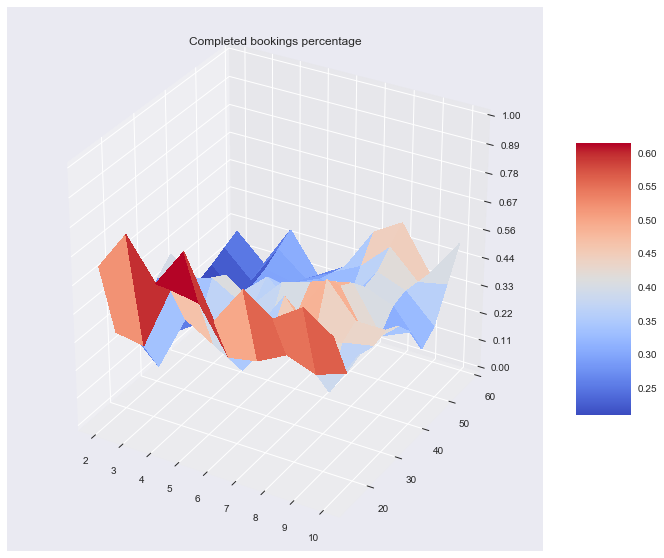

In [114]:
# Interpolate unstructured D-dimensional data.
z2 = griddata(df['vehicles'], df['demands'], df['completedBookingsPercentage'], x2, y2, interp='linear')

# Ready to plot
fig = plt.figure(figsize=(12,10))

ax = fig.gca(projection='3d')
surf = ax.plot_surface(x2, y2, z2, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(0, 1)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Completed bookings percentage')
plt.savefig('completedbookings.png')


plt.show()

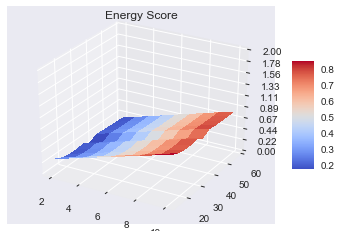

In [591]:
# Interpolate unstructured D-dimensional data.
z2 = griddata(df['vehicles'], df['demands'], df['energyScore'], x2, y2, interp='linear')

# Ready to plot
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x2, y2, z2, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(0, 2)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Energy Score')
plt.savefig('waitingtime.png')


plt.show()

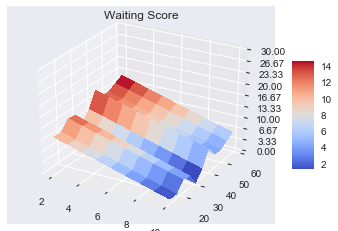

In [592]:
# Interpolate unstructured D-dimensional data.
z2 = griddata(df['vehicles'], df['demands'], df['waitingScore'], x2, y2, interp='linear')

# Ready to plot
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x2, y2, z2, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(0, 30)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Waiting Score')

plt.show()

## Generate Constant demand over one hour

In [75]:
csv = 'demands/46_demands.csv'
demands = pd.read_csv(csv)
import datetime
nDemands = demands.shape[0]
interval = 3600.0/float(nDemands)

In [76]:
str(datetime.timedelta(seconds=interval))

In [78]:
import datetime
nDemands = demands.shape[0]
interval = 3600.0/float(nDemands)

In [79]:
str(datetime.timedelta(seconds=interval))

'0:01:32.307692'

In [82]:
interval = "1min32s"

In [83]:
rng = pd.date_range(start='2012-01-04 12:00:00', periods=nDemands,freq=interval)
demands['pickupTime'] = rng
demands['pickupTime'] = demands['pickupTime'].apply(lambda x: x.strftime('%H:%M:%S') + ' AM')
demands.to_csv(csv, index=False)